#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

#Uploading Datasets

In [72]:
drive.mount("datasets")

Drive already mounted at datasets; to attempt to forcibly remount, call drive.mount("datasets", force_remount=True).


In [73]:
data=pd.read_csv("/content/datasets/MyDrive/PIAIC datasets/compresive_strength_concrete.csv")

In [74]:
data.shape

(1030, 9)

In [75]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#Standardization

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)
Data=scaler.transform(data)
Data=pd.DataFrame(Data,columns=list(data.columns))
Data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


#Selecting features and target feature

In [77]:
X = Data.drop(columns=Data.columns[8])

In [78]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264
...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176


In [79]:
Y=Data[Data.columns[8]]

In [80]:
Y=pd.DataFrame(Y)

In [81]:
Y

,"Concrete compressive strength(MPa, megapascals)"
0,0.967485
1,0.741996
2,0.472655
3,0.482372
4,0.522860
...,...
1025,0.522611
1026,0.359412
1027,0.266226
1028,0.379220


#Training and testing data splittion

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.5,shuffle=True)

#Model selection

In [93]:
from tensorflow.keras import layers as L
from tensorflow.keras import models as M
from tensorflow.keras.regularizers import L2

In [114]:
network = M.Sequential()
network.add(L.Dense(10,activation="relu",kernel_regularizer="L2",input_shape=(X_train.shape[1],)))
network.add(L.Dense(8,activation="relu"))
network.add(L.Dense(6,activation="relu"))
network.add(L.Dense(1,activation="sigmoid"))
epoch=100
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [115]:
history=network.fit(X_train,Y_train,epochs=epoch,validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.1383 - mae: 0.1964 - val_loss: 0.1230 - val_mae: 0.1759
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1269 - mae: 0.1842 - val_loss: 0.1159 - val_mae: 0.1730
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1200 - mae: 0.1817 - val_loss: 0.1097 - val_mae: 0.1709
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1151 - mae: 0.1852 - val_loss: 0.1039 - val_mae: 0.1690
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1092 - mae: 0.1826 - val_loss: 0.0983 - val_mae: 0.1668
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1031 - mae: 0.1753 - val_loss: 0.0931 - val_mae: 0.1647
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0981 - mae: 0.1773 - val_loss: 0.0882 - val_mae: 0.1629
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0916 - 

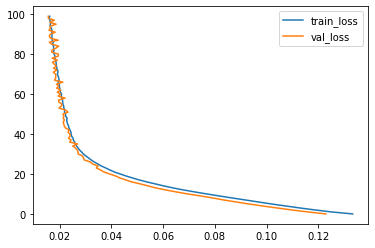

In [116]:
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]
plt.plot(train_loss,range(0,epoch))
plt.plot(val_loss,range(0,epoch))
plt.legend(["train_loss","val_loss"])

In [117]:
loss,accuracy=network.evaluate(X_test,Y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0157 - mae: 0.0883
